In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*   pclass - класс билета
*   sibsp	- сиблинги и супруги на борту
*   parch	- родители и дети на борту
*   fare - пассажирский тариф
*   cabin - номер каюты
*   embarked - порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
titanic0 = pd.read_csv('/content/gdrive/MyDrive/data_sets/train.csv')
titanic1 = pd.read_csv('/content/gdrive/MyDrive/data_sets/test.csv')
titanic2 = pd.read_csv('/content/gdrive/MyDrive/data_sets/gender_submission.csv')
titanic2.drop(columns=['PassengerId'], inplace=True)
titanic_concat = pd.concat([titanic1, titanic2], axis=1)

In [ ]:
titanic = pd.concat([titanic0, titanic_concat])

In [ ]:
titanic['Sex'] = titanic['Sex'].replace(['male'], 0)
titanic['Sex'] = titanic['Sex'].replace(['female'], 1)
titanic['Embarked'] = titanic['Embarked'].replace(['S'], 0)
titanic['Embarked'] = titanic['Embarked'].replace(['C'], 1)
titanic['Embarked'] = titanic['Embarked'].replace(['Q'], 2)

In [ ]:
titanic.groupby('Survived').size()

Survived
0    815
1    494
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 132.9+ KB


In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].median(), inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [ ]:
titanic.drop(columns=['PassengerId', 'Cabin'], inplace=True)

In [ ]:
titanic_stand = titanic.copy()

In [ ]:
titanic_stand.drop(columns=['Name', 'Ticket'], inplace=True)

In [ ]:
scaler = StandardScaler()
scaler.fit(titanic_stand)

StandardScaler()

In [ ]:
scaler.mean_

array([ 0.37738732,  2.29488159,  0.35599694, 29.88113767,  0.49885409,
        0.38502674, 33.29547928,  0.39419404])

In [ ]:
titanic_stand.mean()

Survived     0.377387
Pclass       2.294882
Sex          0.355997
Age         29.881138
SibSp        0.498854
Parch        0.385027
Fare        33.295479
Embarked     0.394194
dtype: float64

In [ ]:
scaler.scale_

array([ 0.48473305,  0.83751593,  0.47881429, 12.8782713 ,  1.04126043,
        0.86522959, 51.71911251,  0.65324943])

In [ ]:
titanic_stand.std()

Survived     0.484918
Pclass       0.837836
Sex          0.478997
Age         12.883193
SibSp        1.041658
Parch        0.865560
Fare        51.738879
Embarked     0.653499
dtype: float64

In [ ]:
titanic_stand_std = pd.DataFrame(scaler.transform(titanic_stand), columns=titanic_stand.columns)
#titanic_stand_std

Чтобы перейти от научной формы чисел к обычной, можно поменять опцию отображение float чисел

In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
titanic_stand_std.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000,1309.0000
mean,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-0.7785,-1.5461,-0.7435,-2.3071,-0.4791,-0.4450,-0.6438,-0.6034
25%,-0.7785,-0.3521,-0.7435,-0.6120,-0.4791,-0.4450,-0.4911,-0.6034
50%,-0.7785,0.8419,-0.7435,0.0000,-0.4791,-0.4450,-0.3643,-0.6034
75%,1.2844,0.8419,1.3450,0.3975,0.4813,-0.4450,-0.0391,0.9274
max,1.2844,0.8419,1.3450,3.8917,7.2039,9.9569,9.2622,2.4582


<Axes: >

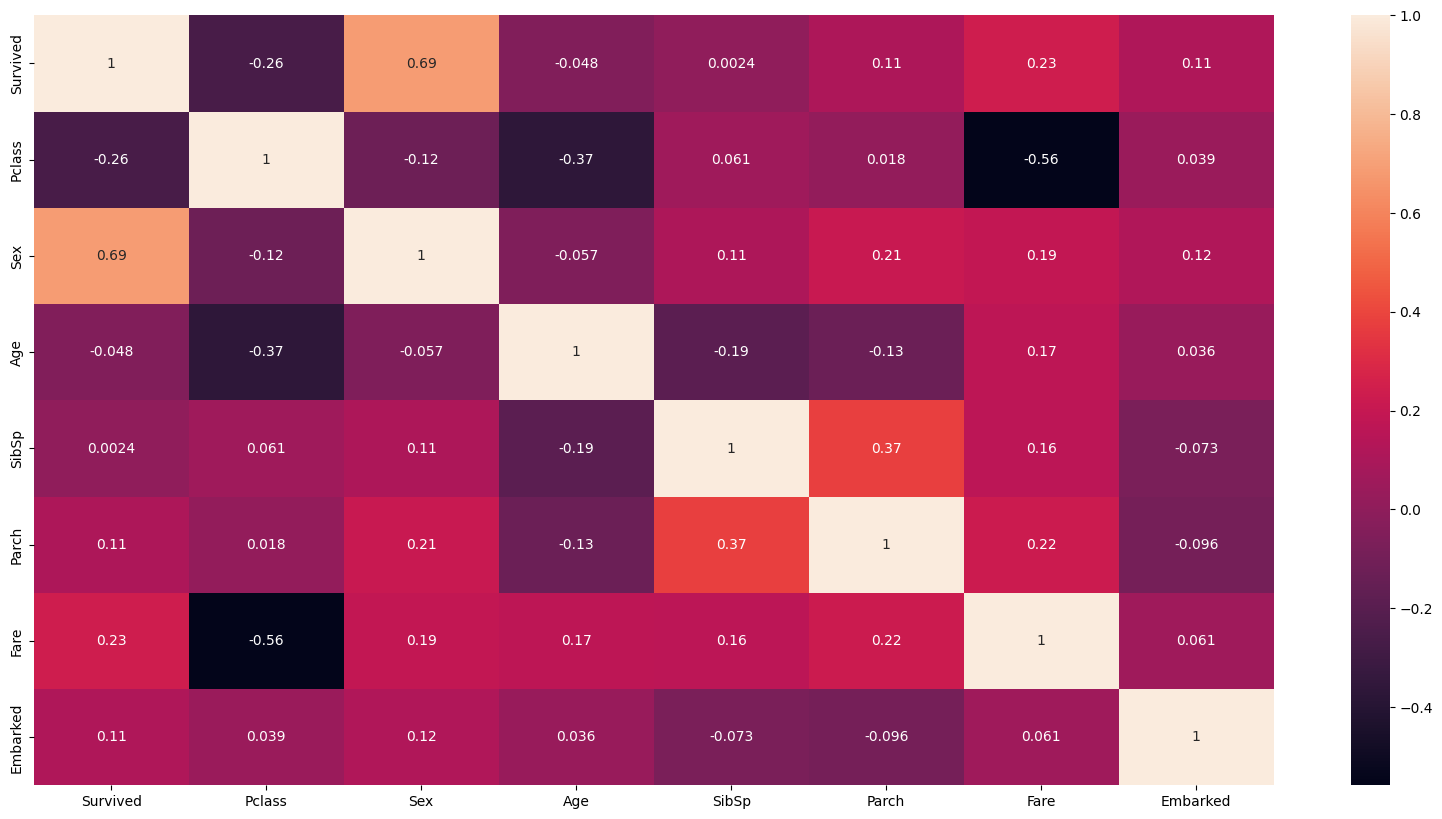

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(titanic_stand_std.corr(), annot=True)

<Axes: >

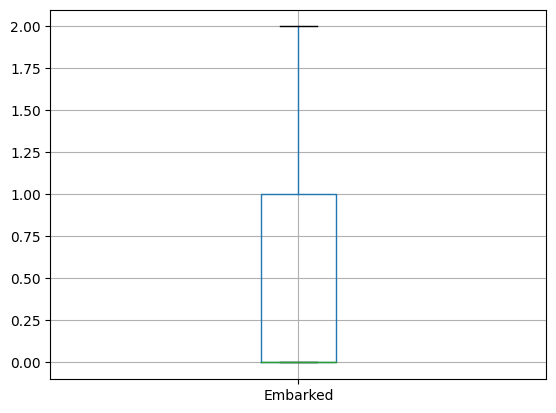

In [ ]:
titanic.boxplot('Embarked')

In [ ]:
child_three_class = titanic.loc[(titanic['Age'] < 19) & (titanic['Pclass'] == 2) & (titanic['Survived'] == True)]
child_three_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 9 to 326
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  30 non-null     int64  
 1   Pclass    30 non-null     int64  
 2   Name      30 non-null     object 
 3   Sex       30 non-null     int64  
 4   Age       30 non-null     float64
 5   SibSp     30 non-null     int64  
 6   Parch     30 non-null     int64  
 7   Ticket    30 non-null     object 
 8   Fare      30 non-null     float64
 9   Embarked  30 non-null     float64
dtypes: float64(3), int64(5), object(2)
memory usage: 2.6+ KB


In [ ]:
bin_feat = titanic.copy()

In [ ]:
bin_feat.drop(columns=['Name', 'Ticket'], inplace=True)

In [ ]:
bin_feat.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,2.4675,0.0994,30.3672,0.4969,0.3117,23.8907,0.3374
1,2.0101,0.7794,29.0792,0.5020,0.5061,48.8115,0.4879


<ipython-input-26-cdeb1de5e89a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
<ipython-input-26-cdeb1de5e89a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))


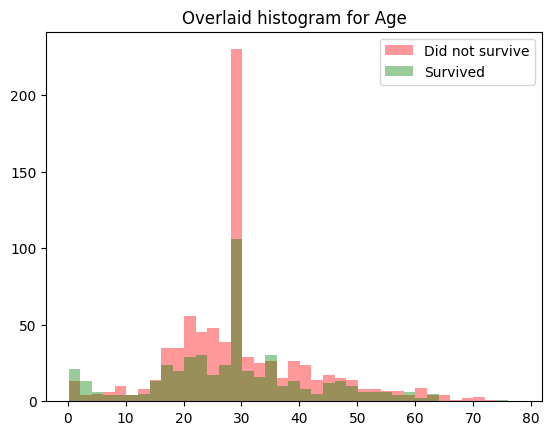

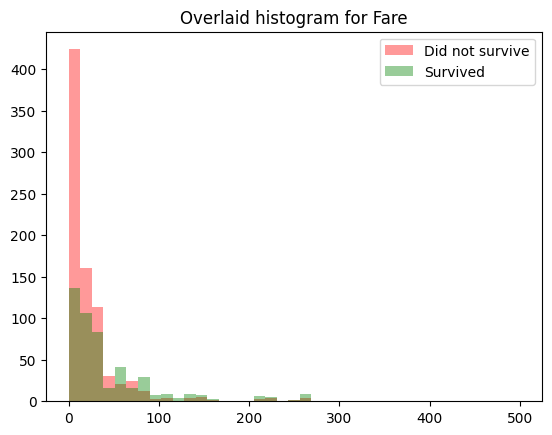

In [ ]:
for i in ['Age', 'Fare']:
  died = list(bin_feat[bin_feat['Survived'] == 0][i].dropna())
  survived = list(bin_feat[bin_feat['Survived'] == 1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

<Figure size 640x480 with 0 Axes>

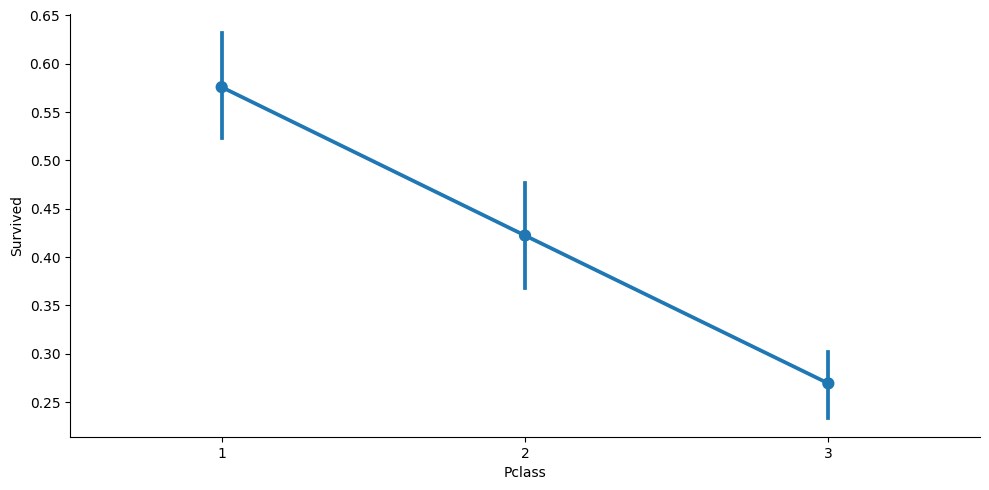

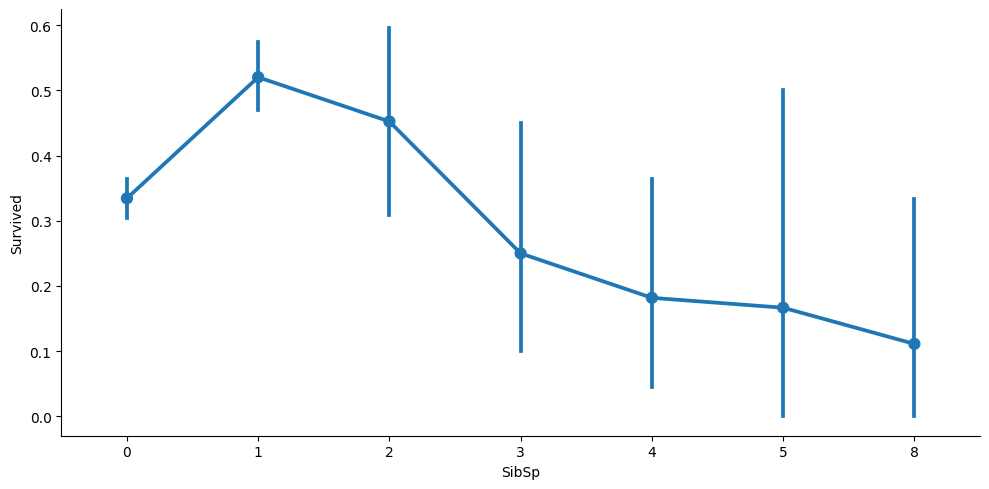

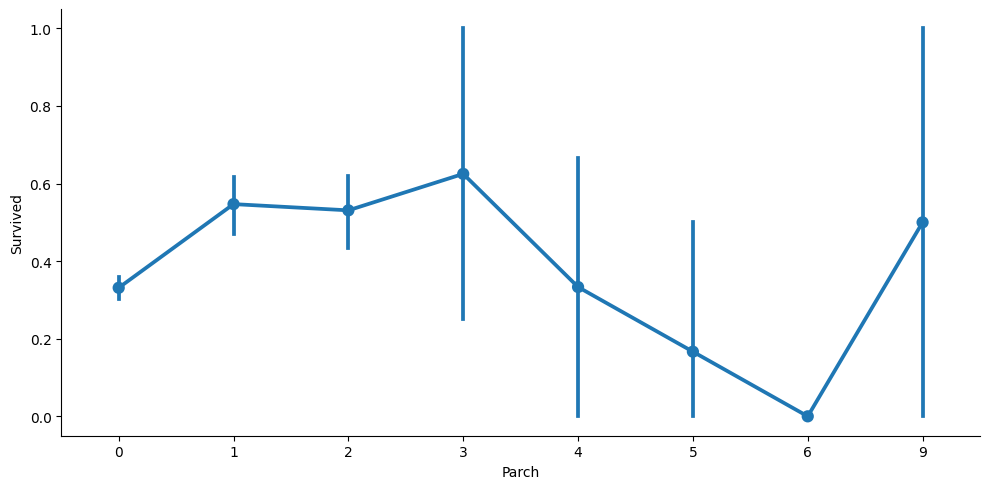

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=bin_feat, kind='point', aspect=2,)

<Figure size 640x480 with 0 Axes>

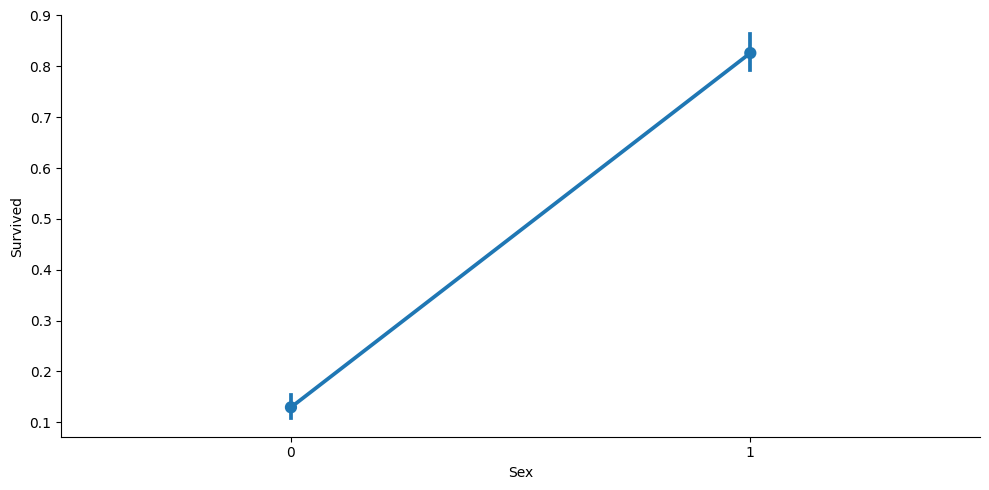

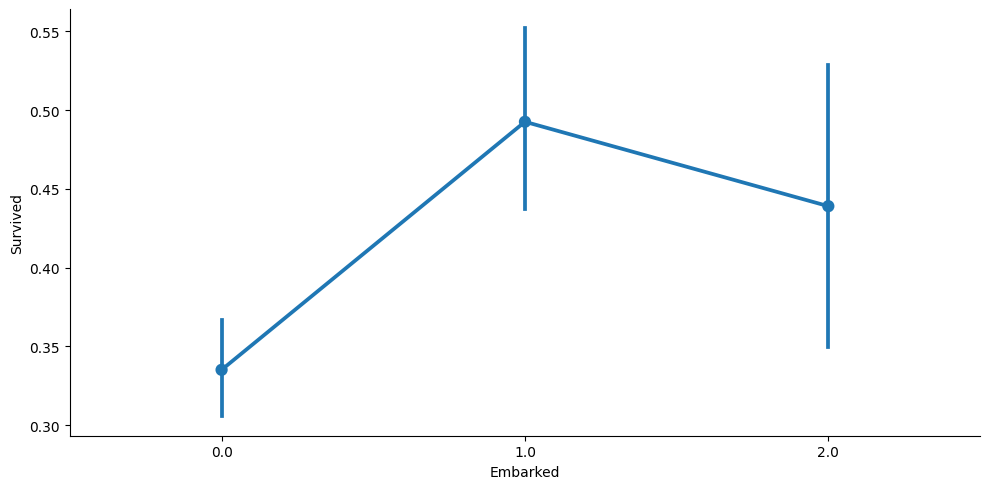

In [ ]:
for i, col in enumerate(['Sex', 'Embarked']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=bin_feat, kind='point', aspect=2,)

In [ ]:
bin_feat.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,0.0000,1.0000,2.0000
Sex,,,
0,623,157,63
1,293,113,60


In [ ]:
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0000,1,0,7.2500,0.0000
1,1,1,1,38.0000,1,0,71.2833,1.0000
2,1,3,1,26.0000,0,0,7.9250,0.0000
3,1,1,1,35.0000,1,0,53.1000,0.0000
4,0,3,0,35.0000,0,0,8.0500,0.0000


In [ ]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


In [ ]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, cv=5)

In [ ]:
scores

array([0.82165605, 0.84713376, 0.87261146, 0.8343949 , 0.82165605])

In [ ]:
hyperparams = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [2, 12, 24, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [ ]:
def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [ ]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 2, 'n_estimators': 50}

Mean 0.837 Standard Deviation 0.082 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.847 Standard Deviation 0.078 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.859 Standard Deviation 0.064 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.846 Standard Deviation 0.061 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.841 Standard Deviation 0.062 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.85 Standard Deviation 0.031 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.845 Standard Deviation 0.037 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.847 Standard Deviation 0.014 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.828 Standard Deviation 0.066 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.847 Standard Deviation 0.043 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.828 Standard Deviation 0.023 Hyperparame

In [ ]:
rf1 = RandomForestClassifier(n_estimators=25, max_depth=2)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf2.fit(X_train, y_train)

rf3 = RandomForestClassifier(n_estimators=50, max_depth=12)
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=50)

In [ ]:
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(X_val)
  accuracy = round(accuracy_score(y_val, y_pred), 3)
  precision = round(precision_score(y_val, y_pred), 3)
  recall = round(recall_score(y_val, y_pred), 3)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 2 || Estimators: 25 || Accuracy: 0.824 || Precision: 0.786 || Recall: 0.771
Max Depth: 12 || Estimators: 100 || Accuracy: 0.828 || Precision: 0.812 || Recall: 0.743
Max Depth: 12 || Estimators: 50 || Accuracy: 0.832 || Precision: 0.821 || Recall: 0.743


In [ ]:
y_pred = rf3.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf3.max_depth,
                                                                                                rf3.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 12 || Estimators: 50 || Accuracy: 0.885 || Precision: 0.82 || Recall: 0.872
